# Clothing model

In [38]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
tf.__version__

'2.18.0'

## Cloning the clothes repo

In [13]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 62.76 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## Loading an image with Keras

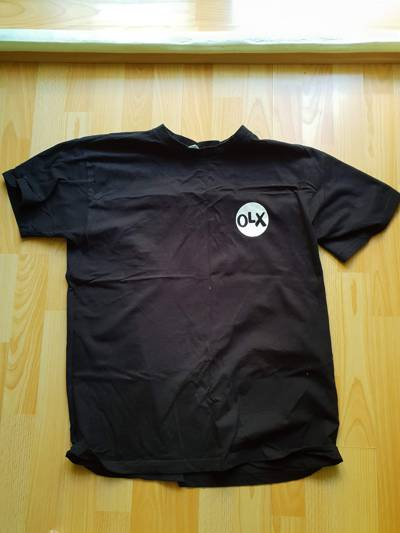

In [8]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

### Resizing images

Neural networks expect images of a certain size e.g. 299*299, 224*224, 150*150. If we have an image that is very large, we need to resize the t-shirt. We can do this with the `target_size` parameter.

The library for processing images is called PIL (Python image library).

Internally the image is represented as an array with 3 channels: RED channel, GREEN channel, BLUE channel and for each channel there is an array containing numbers between 0-255 (1 byte). Each pixel is a combination of a value from each channel (R, G, B).

If we have a 150*150 image with the 3 channels described above, its shape will be (150,150,3).  

We can translate the image we loaded into a numpy array by wrapping the image with `np.array`. Each row is a pixel with (R,G,B) values.

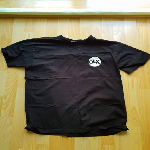

In [3]:
img = load_img(fullname, target_size=(150,150))
img

In [4]:
x = np.array(img)
x.shape

(150, 150, 3)

In [5]:
x

array([[[177, 169,  97],
        [178, 169, 100],
        [182, 173, 104],
        ...,
        [251, 253, 250],
        [251, 253, 248],
        [251, 254, 247]],

       [[200, 190, 128],
        [203, 193, 132],
        [203, 193, 132],
        ...,
        [250, 251, 246],
        [250, 251, 245],
        [250, 251, 245]],

       [[200, 189, 133],
        [203, 192, 136],
        [202, 191, 135],
        ...,
        [253, 250, 245],
        [252, 249, 242],
        [251, 248, 239]],

       ...,

       [[171, 157,  82],
        [170, 156,  81],
        [171, 157,  82],
        ...,
        [184, 142,  32],
        [180, 133,  25],
        [182, 135,  27]],

       [[171, 157,  82],
        [170, 156,  81],
        [171, 157,  82],
        ...,
        [187, 144,  32],
        [179, 132,  24],
        [181, 134,  26]],

       [[170, 156,  81],
        [171, 157,  82],
        [170, 156,  81],
        ...,
        [184, 138,  26],
        [182, 134,  23],
        [181, 133,  22]]

## Using pre-trained neural networks

[Keras Applications](https://keras.io/api/applications/) are pretrained models. The models were trained on the [ImageNet](https://www.image-net.org/) dataset. This dataset is made up of multiple classes of images i.e. there are animals, objects and contains more than 1 million images. This is a dataset for general purpose image classification.

There are multiple models available that differ according to their architecture. 

We will use [`Xception`](https://keras.io/api/applications/xception/) because it has a good tradeoff between size, accuracy and speed. Xception is a convolutional neural network that is 71 layers deep. The pretrained network can classify images into 1000 object categories.

In [3]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
img = load_img(fullname, target_size=(299,299))
x = np.array(img)

In [4]:
model = Xception(
    weights="imagenet", # We want to use a neural network that was trained on imagenet, i.e. use pretrained model
    input_shape=(299,299,3)
)

I0000 00:00:1733485249.881901    1210 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


The model expects multiple images. For just now we will just predict what one is.

In [11]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

Before we can run a prediction, we need to preprocess our input. Our RGB values have been converted to numbers between -1 and 1. We need to preprocess our image data like this because this is how the data that trained the model was preprocessed so the model expects data in this format.

In [12]:
X = preprocess_input(X)
X

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312],
         ...,
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.99215686,  0.9372549 ]],

        [[ 0.47450984,  0.4039216 , -0.12156862],
         [ 0.4666667 ,  0.39607847, -0.12941176],
         [ 0.45882356,  0.38823533, -0.15294117],
         ...,
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.92941177]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.49803925, -0.01176471],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        ...,

        [[ 0.2941177 ,  0.18431377, -0

In [13]:
prediction = model.predict(X)
prediction.shape

I0000 00:00:1733485294.287817    1327 service.cc:148] XLA service 0x7f137c002b00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733485294.287850    1327 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-06 11:41:34.324917: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733485294.661132    1327 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-06 11:41:35.810217: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1733485296.632162    1327 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(1, 1000)

**What does this mean?**

We get a result that is 1 * 1000. This neural network can classify images into 1000 object categories. Each value in the array is the probability that the image belongs to a particular object class.

To get a mapping to the underlying object classes, we can use the helper method `decode_predictions`.

By default this returns the top 5 guesses. You can modify this by setting `top` to a number.

In [14]:
decode_predictions(prediction, top=9)

[[('n03595614', 'jersey', np.float32(0.6819637)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139876)),
  ('n04370456', 'sweatshirt', np.float32(0.03432471)),
  ('n03710637', 'maillot', np.float32(0.011354204)),
  ('n04525038', 'velvet', np.float32(0.0018453564)),
  ('n03188531', 'diaper', np.float32(0.0016677275)),
  ('n02730930', 'apron', np.float32(0.0015738567)),
  ('n02963159', 'cardigan', np.float32(0.001520003)),
  ('n03877472', 'pajama', np.float32(0.001430838))]]

**Results**

The top result was jersey. Our image is a t-shirt. On a plus point, it's identified the image as an item of clothing but why hasn't it picked out t-shirt? 

ImageNet has 1000 classes but no `t-shirt` class. The pre-trained model is perhaps good for general predictions about images but for our purpose might not be good enough.

**Building on top of existing models**

We don't need to build a model from scratch. 

## Transfer learning


### Preparing the training and validationg dataset using ImageDataGenerator

We know that the images in our pre-trained neural net have been pre-processed in a certain way. If we want to add additional training data, we will need to use the same preprocessing function (`preprocess_input`). Keras has a tool `ImageDataGenerator` that allows us to transform image data we have into a format suitable for the neural net.

- `preprocessing_function`: pass the known `preprocess_input` function 
- `target_size`: We pick a target_size of (150 * 150) i.e. smaller images so that we can train the model faster. n.b. (299 * 299) is four times as large as (150 * 150) so takes 4 times as long. To experiment we use this size and then to do the final training we will use the larger image size.
- `batch_size`: How many images we read. We pick 32 making the shape of our batch (32, 150, 150,3). This will create a vector of size 32 and eventually 32 predictions

The `flow_from_directory` function returns a generator which we can use in a for loop to iterate over the batches. On each iteration X (the features) and y (labels) are returned. `y` is our target variable. 

Notice that when we run this function, it infers that we have 10 classes from the folder structure of our training dataset.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train',
                                         target_size=(150,150), 
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [17]:
!ls -l clothing-dataset-small/train

total 292
drwxrwsr-x 2 jovyan jovyan 20480 Dec  3 13:22 dress
drwxrwsr-x 2 jovyan jovyan 12288 Dec  3 13:22 hat
drwxrwsr-x 2 jovyan jovyan 36864 Dec  3 13:22 longsleeve
drwxrwsr-x 2 jovyan jovyan 20480 Dec  3 13:22 outwear
drwxrwsr-x 2 jovyan jovyan 36864 Dec  3 13:22 pants
drwxrwsr-x 2 jovyan jovyan 20480 Dec  3 13:22 shirt
drwxrwsr-x 2 jovyan jovyan 20480 Dec  3 13:22 shoes
drwxrwsr-x 2 jovyan jovyan 20480 Dec  3 13:22 shorts
drwxrwsr-x 2 jovyan jovyan 12288 Dec  3 13:22 skirt
drwxrwsr-x 2 jovyan jovyan 65536 Dec  3 13:22 t-shirt


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)
X.shape

(32, 150, 150, 3)

In [20]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

If you look at the `y` above, you can see that one-hot encoding has been applied. 4 of 5 of the images have been classified as t-shirts and 1 as shorts. We can work this out from the class_indices: at index 9 we have t-shirts i.e. if it is a t-shirt then 1 else 0.

This is how we do multiclass classification: you can think of this as 10 different binary variables.

In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation',
                                         target_size=(150,150), 
                                         batch_size=32,
                                         shuffle=False #don't shuffle validation set
                                    )

Found 341 images belonging to 10 classes.


### Training our custom model

We will use Xception as our base model. Xception will extract the feature representation from the image 

- `include_top`: False. This means keep only the convolutional layers, exclude the dense layers. In Keras the mental map of the model goes from bottom to top. At the bottom is the convolutional layers and at the top are the dense layers.
- `input_shape`: specify the shape of your image input

By setting `trainable=False` to the created base_model, we say "Don't train the convolutional layers" i.e. freeze the convolutional layers.

Note that we also need to pass `training=False` to our base_model. See below

In [22]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150,150,3))

base_model.trainable = False

#### Creating a new base top

1. Specify the inputs: this is the part of the model that will receive the images. N.B. our inputs are batches of 32
2. Pass the inputs to the base_model
3. Apply pooling to the base model
4. Create a basic Dense Layer with random numbers

**Why apply pooling?**

The `predict` produces a 4 dimensional output. 32 is the size of the batch. We want to turn this into a 32 x 1D vector. For each (5,5,2048), we can go along each 1 of 2048 and calculate the average of the (5,5) layer to create a 1D vector representation.

Pooling is the term for converting a multidimensional object into a smaller dimensional object. In this case we are doing **2D Average Pooling** because we are taking an average of each of these (5,5) squares.

**Our base Dense Layer**

In our final step we pass vectors to Dense layers to convert inputs to predictions. The dimensionality of the result is 10 because we have 10 classes.

When we create this first base Dense Layer it is initialized with random numbers so our prediction is also a bunch of random numbers. We need to train this model to get something meaningful

In [23]:
# without pooling

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)  # Our base model is 4D: (32,150,150,3) or 3D if you think of it handling 1 image

outputs = base

model = keras.Model(inputs, outputs)

preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(32, 5, 5, 2048)

In [24]:
# with pooling

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False) 

vectors = keras.layers.GlobalAveragePooling2D()(base) # Make the base 1D

outputs = vectors

model = keras.Model(inputs, outputs)

preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 2048)

In [25]:
# Add Base Dense Layer instantiated with random values

num_classes = 10

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False) 

vectors = keras.layers.GlobalAveragePooling2D()(base) # Make the base 1D

outputs = keras.layers.Dense(num_classes)(vectors)

model = keras.Model(inputs, outputs)

preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 10)

In [26]:
preds[0]

array([-0.46781307,  0.4120195 , -0.52382654,  1.2496113 , -0.4328302 ,
        0.43172067,  1.1421537 ,  0.19197392,  0.7568387 , -0.58750165],
      dtype=float32)

#### Adding an optimizer

An optimizer finds the best weights for the model n.b. we find the best weights through iteration: changing each weight and calculating if it is an improvement. There are a lot of Optimizers in Keras. We will use Adam because it is recommended as the default algorithm.

- learning_rate: similar to eta in XGBoost

The optimizer needs to know how it will evalute if a change in weights is better or worse i.e. it needs to know what evaluation metric to use. We are building a multiclass categorisation predictor so we use `CategoricalCrossentropy`. If were building a binary classifier, we would use `BinaryCrossentropy`. If we were solving a regression problem we would use `MeanSquaredError`. `CategoricalCrossentropy` outputs a number. The lower the number the better (were are trying to minimize). The optimizer will try to minimize this number.

- `from_logits`: by default this is False but it is recommended that we set this as True for numerical stability. By setting this to True, the CategoricalCrossentropy loss will **internally** apply softmax to these logits before calculating the cross-entropy loss.

Before we can train the model we need to compile it. We pass in an `accuracy` metric to review the accuracy at each step of training. `accuracy` here means how many images we predicted correctly.

Finally we train the model using `model.fit`.

- `epochs`: the number of times we want to run over our dataset. When we train a model, we normally apply the functions to one batch at a time. When we have gone over all the batches once, we call this an epoch. 

In [27]:
learning_rate=0.01
num_classes = 10

base_model = Xception(weights="imagenet", include_top=False, input_shape=(150,150,3))

base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False) 

vectors = keras.layers.GlobalAveragePooling2D()(base) 

outputs = keras.layers.Dense(num_classes)(vectors) # We keep the raw scores, we do not use a softmax activation, since done by CategoricalCrossentropy

model = keras.Model(inputs, outputs)

optimizer = keras.optimizers.Adam(learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # Apply softmax to logits before calculating the cross-entropy loss

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - accuracy: 0.5732 - loss: 1.6803 - val_accuracy: 0.7654 - val_loss: 0.9699
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8254 - loss: 0.5335 - val_accuracy: 0.7419 - val_loss: 0.9807
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8967 - loss: 0.3263 - val_accuracy: 0.8006 - val_loss: 0.8388
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9352 - loss: 0.1769 - val_accuracy: 0.8065 - val_loss: 0.8372
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9320 - loss: 0.2089 - val_accuracy: 0.7977 - val_loss: 0.9713
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9607 - loss: 0.1215 - val_accuracy: 0.7918 - val_loss: 0.9682
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9700 - loss: 0.0939 - val_accuracy: 0.8065 - val_loss: 0.9039
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9721 - loss: 0.0851 - val_accuracy: 0.8152 - val_loss: 

You can see from the output that the model looks too good (98% ?!?) to be true in later epochs: this is probably because it is overfitting.

We got a reasonable accuracy score after only a few epochs/iterations. Still we can tune the parameters to improve our model.

Plotting the results, we can see that the accuracy rises to around 80% and oscillates around this value.

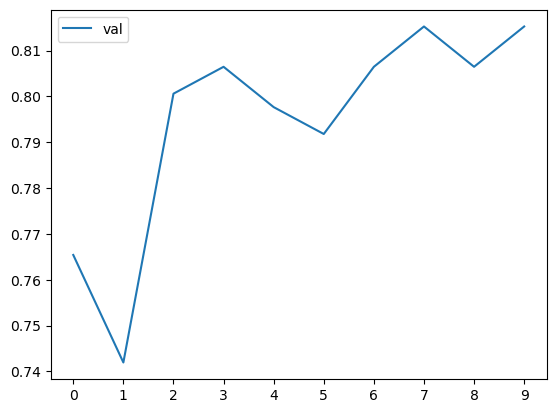

In [29]:
#plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))
plt.legend()
plt.show()

## Tuning: adjusting the learning rate

As with XGBoost tuning, we will iterate over different learning rate values, train and evaluate the models.

In [57]:
def create_basic_architecture(size_inner=0, drop_rate=0, input_shape=(150,150,3), num_classes=10):
    base_model = Xception(weights="imagenet", include_top=False, input_shape=input_shape)
    
    base_model.trainable = False

    ##########################
    
    inputs = keras.Input(shape=input_shape)
    
    base = base_model(inputs, training=False) 
    
    vectors = keras.layers.GlobalAveragePooling2D()(base) 

    if size_inner > 0:
        print(size_inner)
        vectors = keras.layers.Dense(size_inner, activation='relu')(vectors)
        if drop_rate > 0:
            print(drop_rate)
            vectors = keras.layers.Dropout(drop_rate)(vectors)

    outputs = keras.layers.Dense(num_classes)(vectors) 
    
    model = keras.Model(inputs, outputs)

    return model
    

In [31]:
def make_model(learning_rate=0.01, size_inner=0, drop_rate= 0, input_shape=(150,150,3), num_classes=10):
    model = create_basic_architecture(input_shape=input_shape, drop_rate=drop_rate, num_classes=num_classes, size_inner=size_inner)
     
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [32]:
scores = {}

for lr in [0.0001,0.001,0.01,0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.1987 - loss: 2.2750 - val_accuracy: 0.5015 - val_loss: 1.6729
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5305 - loss: 1.4966 - val_accuracy: 0.6129 - val_loss: 1.2949
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6123 - loss: 1.2166 - val_accuracy: 0.6716 - val_loss: 1.1070
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6745 - loss: 1.0377 - val_accuracy: 0.7155 - val_loss: 0.9827
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7001 - loss: 0.9413 - val_accuracy: 0.7478 - val_loss: 0.9010
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7161 - loss: 0.8777 - val_accuracy: 0.7566 - val_loss: 0.8479
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7385 - loss: 0.8057 - val_accuracy: 0.7742 - val_loss: 0.8039
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7564 - loss: 0.7741 - val_accuracy: 0

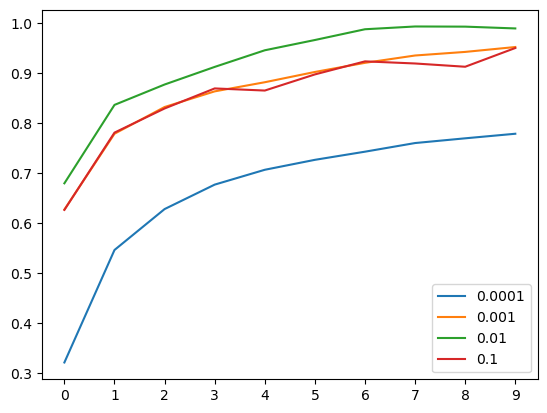

In [33]:
# plot training accuracy

for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=lr)
plt.xticks(np.arange(10))
plt.legend()
plt.show()

Note that in the instructor's plots the 0.1 learning rate is less than the 0.01 learning rate, which is a little strange.

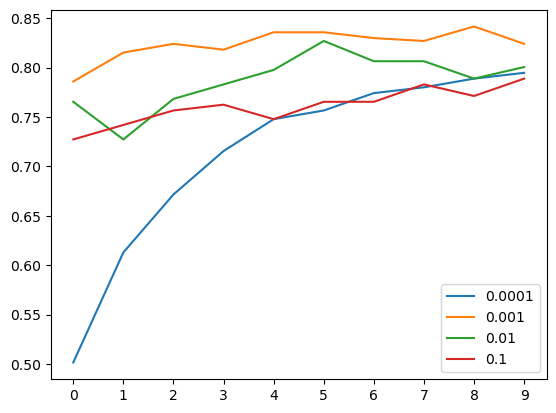

In [34]:
# plot validation accuracy

for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)
plt.xticks(np.arange(10))
plt.legend()
plt.show()

The smallest learning rate (0.0001) is too slow. You can see that 0.001 is always better than 0.01 so we choose 0.001 as the learning rate. To double check this assumption, look at the training accuracy plots in comparison to the validation accuracy plots. The distance between the two plots for 0.001 is less, indicating that this is a better learning rate.

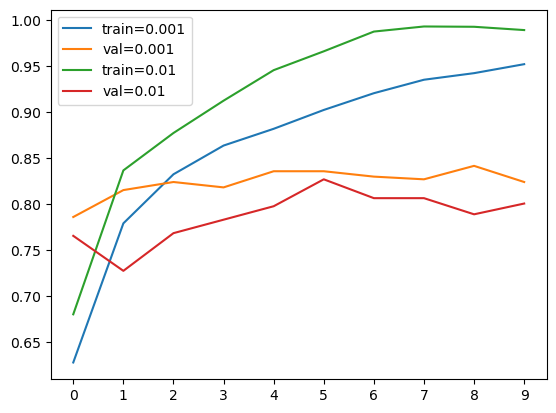

In [37]:
for lr, hist in scores.items():
    if lr in (0.0001,0.1):
        continue
    plt.plot(hist["accuracy"], label=(f'train={lr}'))
    plt.plot(hist["val_accuracy"], label=(f'val={lr}'))
plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [39]:
learning_rate = 0.001

## Checkpointing

Checkpointing is a way of saving our model after each iteration or when certain conditions are met e.g. when the model achieves the best performance so far.

We want to save our model when it hits new performance highs. 

We have been training our model for 10 epochs. At the end of each epoch, we currently evaluate it on the validation dataset but we can run other kinds of functions here too (callbacks). There are a lot of existing callback functions in the `keras.callbacks` package.

We will use `keras.callbacks.ModelCheckpoint`, which takes the following arguments:

- first argument: the name of the file to save the checkpointed model to:`keras.callbacks.ModelCheckpoint('xception_v1{epoch:02d}_{val_accuracy:.3f}.h5' )`
- `save_best_only`: True/False. Only save the model with the highest accuracy on the validation set. If set to False then we save a model after each epoch, if True, we only save improvements over a previous result. This means that you could end up with more than one model as it charts the journey.
- `monitor`: here you specify what metric you want to monitor. We use `val_accuracy`
- `mode`: by default this is set to auto. We set it to `max` because we want to maximise accuracy. If we were monitoring loss, we would choose `min` to minimise the loss.

In [42]:
# I had to modify the file extension to .keras after getting an error that .h5 was invalid
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1{epoch:02d}_{val_accuracy:.3f}.keras',
                                save_best_only=True,
                                monitor='val_accuracy',
                                mode='max'
                               )

Make our model with our best learning rate and add our callback. This will train the model and save the models which are best to our local directory. By tracking the logs, you can verify that only epochs with improvements are saved.

In the lectures, there were improvements up to epoch 6/ our best model is reached after epoch 6.

But for me, the best model was reached after epoch 4.

In [43]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(train_ds, 
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[checkpoint]
                   )

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.5421 - loss: 1.3959 - val_accuracy: 0.7889 - val_loss: 0.6923
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7786 - loss: 0.6277 - val_accuracy: 0.8299 - val_loss: 0.6087
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8302 - loss: 0.5098 - val_accuracy: 0.8152 - val_loss: 0.5716
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8743 - loss: 0.4217 - val_accuracy: 0.8270 - val_loss: 0.5526
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8905 - loss: 0.3657 - val_accuracy: 0.8152 - val_loss: 0.5394
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9079 - loss: 0.3169 - val_accuracy: 0.8211 - val_loss: 0.5238
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9181 - loss: 0.2945 - val_accuracy: 0.8270 - val_loss: 0.5300
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9343 - loss: 0.2567 - val_accuracy: 0.8152 -

## Tuning: Adding more layers and finding the best size

I have updated `create_basic_architecture` to add another dense layer if `size_inner` is set.

We can use this to tune the size of the inner dense layer.

We plot the results to see if any value is a clear winner. If there are none i.e. the accuracy of the validation set reaches a similar high for at least two of the sizes, then we don't need an extra layer. If there is no clear winner and we conclude that adding this extra layer isn't useful then this result is a little surprising because often the extra layers improve accuracy. However there is a cost to adding this layer: it adds more complexity to the model. Before we discard it completely, we can tune some more parameters that might make it worthwhile.

In [44]:
learning_rate = 0.001
scores = {}

for size in [10,100,1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.3920 - loss: 1.7415 - val_accuracy: 0.6452 - val_loss: 1.0297
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6855 - loss: 0.9376 - val_accuracy: 0.7126 - val_loss: 0.8011
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7675 - loss: 0.7119 - val_accuracy: 0.7273 - val_loss: 0.7576
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8049 - loss: 0.5880 - val_accuracy: 0.7566 - val_loss: 0.6684
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8469 - loss: 0.5026 - val_accuracy: 0.7771 - val_loss: 0.6241
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8719 - loss: 0.4275 - val_accuracy: 0.7947 - val_loss: 0.5715
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8922 - loss: 0.3870 - val_accuracy: 0.7977 - val_loss: 0.5714
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9095 - loss: 0.3350 - val_accuracy: 0.797

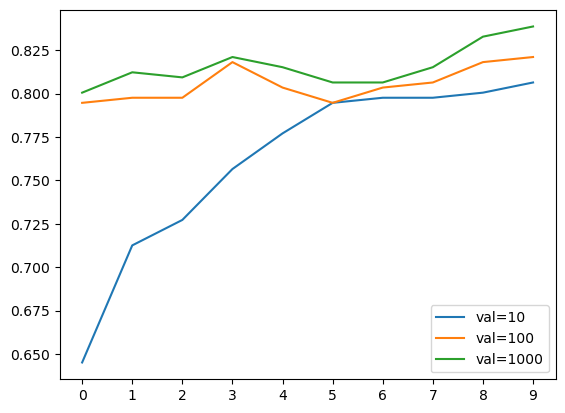

In [48]:
for size, hist in scores.items():
    #plt.plot(hist["accuracy"], label=(f'train={size}'))
    plt.plot(hist["val_accuracy"], label=(f'val={size}'))
plt.xticks(np.arange(10))
#plt.yticks([0.78,0.80,0.82,0.825,0.83])
plt.legend()
plt.show()

It's worth remember that we reached an accuracy of  0.8270. Our results are a little different from the lectures: It looks like adding an inner layer with 1000 neurons would be useful: it always performs better than the others. We will stick with the lectures for just now and choose a size of 100 for the next section. 

## Regularization: Adding dropout and finding what % of dropout produces the best result

Because we add regularization, we need more epochs (10 is not enough). Note this can take 30 minutes!


In the lectures, 80% was significantly lower than the other drop rates for most epochs but then in later epochs it became similar. 

**Suspicious results**

You should not always choose the parameters which produced the highest accuracy. Look out for sudden spikes!

In the lectures with drop_rate of 50%, after around 20 epochs there was a sudden spike in accuracy: this drop_rate had oscilated around a score of around 0.83 but at this point it hit a high of 0.85. Is this just luck? Is this overfitting?

To work out if it's a case of luck or overfitting compare with the training data: in this case the training data's accuracy at this point was very high and had been high for a while which can indicate that the model is starting to overfit. If the training dataset's accuracy is still on the rise and there is less of a gap between the accuracy and training curves, then this is a better point to derive your parameters. 

In the lectures 0.2 drop_rate was picked.

In [49]:
learning_rate = 0.001
size = 100
scores = {}

for drop_rate in [0.0,0.2,0.5,0.8]:
    print(drop_rate)
    
    model = make_model(learning_rate=learning_rate, size_inner=size, drop_rate=drop_rate)

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[drop_rate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.5590 - loss: 1.2878 - val_accuracy: 0.7859 - val_loss: 0.6699
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8242 - loss: 0.5269 - val_accuracy: 0.7918 - val_loss: 0.5890
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8839 - loss: 0.3580 - val_accuracy: 0.8182 - val_loss: 0.5411
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9214 - loss: 0.2676 - val_accuracy: 0.7977 - val_loss: 0.5644
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9490 - loss: 0.1842 - val_accuracy: 0.8152 - val_loss: 0.5357
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9725 - loss: 0.1281 - val_accuracy: 0.8035 - val_loss: 0.6426
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9816 - loss: 0.0982 - val_accuracy: 0.8416 - val_loss: 0.5682
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9915 - loss: 0.0627 - val_accuracy: 0.84

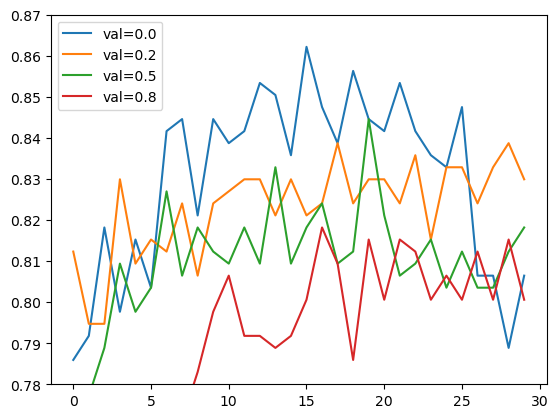

In [55]:
for drop_rate, hist in scores.items():
    #plt.plot(hist["accuracy"], label=(f'train={drop_rate}'))
    plt.plot(hist["val_accuracy"], label=(f'val={drop_rate}'))
plt.ylim(0.78,0.87)
plt.legend()
plt.show()

In the lectures we compared our chosen 0.2 dropout rate with applying no dropout and they were fairly similar. Still the decision was to go with regularization to combat overfitting.

When I ran this, it did look like no regularization was the clear winner.

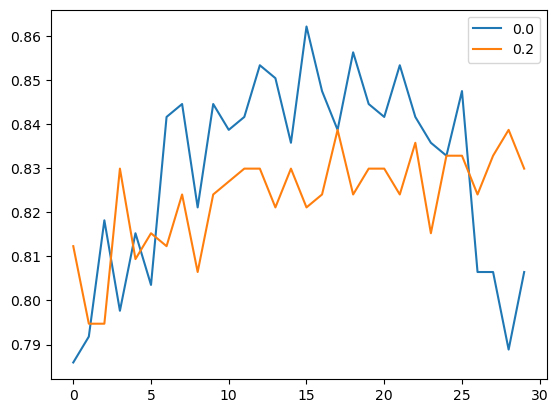

In [56]:
hist = scores[0.0]
plt.plot(hist["val_accuracy"], label=0.0)

hist = scores[0.2]
plt.plot(hist["val_accuracy"], label=0.2)

plt.legend()
plt.show()

In [58]:
model_with_drop_rate = make_model(learning_rate=learning_rate, size_inner=size, drop_rate=0.2)
history = model_with_drop_rate.fit(train_ds, epochs=30, validation_data=val_ds)

100
0.2
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.5317 - loss: 1.4175 - val_accuracy: 0.7771 - val_loss: 0.7096
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7988 - loss: 0.6132 - val_accuracy: 0.8182 - val_loss: 0.5854
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8436 - loss: 0.4716 - val_accuracy: 0.7947 - val_loss: 0.5902
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8922 - loss: 0.3499 - val_accuracy: 0.8270 - val_loss: 0.5334
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9127 - loss: 0.2731 - val_accuracy: 0.8182 - val_loss: 0.5832
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9317 - loss: 0.2381 - val_accuracy: 0.8152 - val_loss: 0.5678
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9465 - loss: 0.1661 - val_accuracy: 0.8240 - val_loss: 0.5822
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9656 - loss: 0.1383 - val_accuracy: 